![人工智慧 - 自由團隊](https://raw.githubusercontent.com/chenkenanalytic/img/master/af/aifreeteam.png)


<center>Welcome to the image recognition practice for Traditional Chinese Handwriting Characters by AI . FREE Team.</center>
<br>
<center>歡迎大家來到 AI . FREE Team 所開發的繁體中文手寫圖像辨識實作。 </center>
<br>

<center>(Author: Yen-Lin 博士, Chen Ken；Date of published: 2020/4/29；AI . FREE Team Website: https://aifreeblog.herokuapp.com/)</center>

說明：此圖像辨識實作使用 <a href="https://github.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset">Traditional Chinese Handwriting Dataset</a> 專案之資料集。

# 程式測試區

In [ ]:
import os
import shutil
#RawDataPath = '/content/Handwritten_Data'
RawDataPath = '/content/drive/My Drive/handwriting_CNN/train_set'
#TraningDataPath = '/content/Traditional_Chinese_Testing_Data/Handwriting-Chinese-Characters-Recognition/train data'
TraningDataPath = '/content/Train_Data'
#TestingDataPath = '/content/Traditional_Chinese_Testing_Data/Handwriting-Chinese-Characters-Recognition/test data'
ValidDataPath = '/content/Valid_Data'
TestingDataPath = '/content/drive/My Drive/handwriting_CNN/test_set'

shutil.rmtree( TraningDataPath )
shutil.rmtree( ValidDataPath )


# Step 0: 匯入套件

載入雲端硬碟

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
path="/content/drive/My Drive/handwriting_CNN/train_set"
os.chdir(path)
os.listdir(path)

['仁',
 '往',
 '心',
 '梁',
 '媒',
 '什',
 '樊',
 '企',
 '威',
 '局',
 '黃',
 '要',
 '清',
 '檀',
 '涂',
 '袁',
 '魯',
 '言',
 '秀',
 '翁']

In [4]:
from platform import python_version
import os
import shutil
import numpy as np
import pandas as pd
import PIL.Image
from matplotlib import pyplot as plt
from matplotlib.font_manager import findfont, FontProperties
'''
繁體中文顯示設定
'''
from matplotlib.font_manager import FontProperties

default_type = findfont( FontProperties( family=FontProperties().get_family() ) )
ttf_path = '/'.join( default_type.split('/')[:-1] )  # 預設字型的資料夾路徑 

os.chdir( '/content' )
if not os.path.exists( '/content/matplotlib_Display_Chinese_in_Colab' ):
    !git clone https://github.com/YenLinWu/matplotlib_Display_Chinese_in_Colab

os.chdir( '/content/matplotlib_Display_Chinese_in_Colab' )
for item in os.listdir():  
    if item.endswith( '.ttf' ):
        msj_ttf_path = os.path.abspath( item ) 
        msj_name = msj_ttf_path.split('/')[-1] 

try:  
    shutil.move( msj_ttf_path, ttf_path )
except: 
    pass
finally:
    os.chdir( '/content' )
    shutil.rmtree( '/content/matplotlib_Display_Chinese_in_Colab' )
font = FontProperties( fname=ttf_path+'/'+msj_name )

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  
from tensorflow.keras.optimizers import *

print( 'Python Version: ', python_version() )
print( 'TensorFlow Version: ', tf.__version__ )
print( 'Keras Version: ', tf.keras.__version__ ) 

Cloning into 'matplotlib_Display_Chinese_in_Colab'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.
Python Version:  3.7.11
TensorFlow Version:  2.5.0
Keras Version:  2.5.0


# Step 1: 使用 Data Deployment 教學，下載繁體中文手寫資料集
資料部署教學：<a href="https://colab.research.google.com/github/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset/blob/master/Data_Deployment_colab.ipynb#scrollTo=BtJidZSSed2C">範例連結</a>

In [ ]:
#!git clone https://github.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset.git

Cloning into 'Traditional-Chinese-Handwriting-Dataset'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 174 (delta 75), reused 22 (delta 6), pack-reused 18
Receiving objects: 100% (174/174), 77.40 MiB | 24.33 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [ ]:
# import os
# import zipfile
# import shutil

# OutputFolder = '/content/Handwritten_Data'

於雲端的/contect資料夾底下建立Handwritten_Data資料夾

In [ ]:
# if not os.path.exists(OutputFolder):
#   os.mkdir(OutputFolder)
#   print( f'Create the new "{OutputFolder}" folder' )

# os.chdir(OutputFolder)

# ### 檢查路徑
# !pwd

/content/Handwritten_Data


# ***使用自訂訓練集時不需要執行***

把剛剛下載到*/content/Traditional-Chinese-Handwriting-Dataset/data* 的訓練字集解壓縮到*/content/Handwritten_Data*




In [ ]:
# CompressedFiles = []

# os.chdir('/content/Traditional-Chinese-Handwriting-Dataset/data')

# for item in os.listdir():  
#   if item.endswith('.zip'): # Check for ".zip" extension.
#     file_path = os.path.abspath(item) # Get full path of the compressed file. 
#     CompressedFiles.append(file_path)

# for file in CompressedFiles:     
#   # Construct a ZipFile object with the filename, and then extract it.
#   zip_ref = zipfile.ZipFile(file).extractall(OutputFolder) 
  
#   source_path = OutputFolder + '/cleaned_data(50_50)'
#   img_list = os.listdir(source_path)

#   for img in img_list:
#       shutil.move(source_path + '/' + img, OutputFolder) # Move a file to another location. 
  
#   shutil.rmtree(OutputFolder + '/cleaned_data(50_50)') 
#   print(f'Decompress successfully {file} ......')

# print( 'Moving images according to traditional Chinese characters......' )

# ImageList = os.listdir(OutputFolder)
# ImageList = [img for img in ImageList if len(img)>1]
# WordList = list(set([w.split('_')[0] for w in ImageList]))

# for w in WordList:
#   try:
#     os.chdir(OutputFolder) # Change the current working directory to OutputPath.
#     os.mkdir(w) # Create the new word folder in OutputPath.
#     MoveList = [img for img in ImageList if w in img]
                
#   except: 
#     os.chdir(OutputFolder)
#     MoveList = [ img for img in ImageList if w in img ]
  
#   finally:            
#     for img in MoveList:
#       old_path = OutputFolder + '/' + img
#       new_path = OutputFolder + '/' + w + '/' + img
#       shutil.move( old_path, new_path )

# print( 'Data Deployment completed.' )

Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-001.zip ......
Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-002.zip ......
Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-003.zip ......
Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-004.zip ......
Moving images according to traditional Chinese characters......
Data Deployment completed.


顯示*/content/Handwritten_Data*字集數量(資料夾)與每個字集樣本數，詳細可點開資料夾

In [ ]:
# a=0
# b=0

# for item in os.listdir(OutputFolder):
#   a += 1
#   for i in os.listdir(OutputFolder + '/' + item):
#     b +=1


# print('總共: ' + str(a) + ' 個字(資料夾) / 總共: ' + str(b) + '個樣本')
# print('平均每個字有: ' + str(b/a) + ' 個樣本')

總共: 4803 個字(資料夾) / 總共: 250712個樣本
平均每個字有: 52.19904226525089 個樣本


# Step 2: 訓練集與自製測試集路徑

In [ ]:
# os.chdir('/content')
# #os.mkdir('Traditional_Chinese_Testing_Data')
# os.mkdir('Train_Data')
# #os.chdir('/content/Traditional_Chinese_Testing_Data')
# os.chdir('/content/Train_Data')

這邊可以改為由google driver載入或是建立新的gitlab載入圖片

In [ ]:
#!git clone https://github.com/AI-FREE-Team/Handwriting-Chinese-Characters-Recognition

### 自製繁中手寫測試集 :   

利用小畫家自製繁體中文字   
* 底圖大小: 50x50 像素   
* 白底黑字    
* 像素筆線條粗細: 1 像素   

將用小畫家自製的繁中手寫文字，以 png 檔儲存，且放於以該字為名的子資料夾中，如下圖所示:   
![自製繁中手寫資料集](https://raw.githubusercontent.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset/master/img/HomeMade_Traditional_Chinese_Dataset.png)

In [ ]:
'''
RawDataPath: 繁中手寫資料集路徑
TraningDataPath: 訓練集路徑
TestingDataPath: 自製繁中手寫資料集路徑
'''
import os
import shutil
#RawDataPath = '/content/Handwritten_Data'
RawDataPath = '/content/drive/My Drive/handwriting_CNN/train_set'
#TraningDataPath = '/content/Traditional_Chinese_Testing_Data/Handwriting-Chinese-Characters-Recognition/train data'
TraningDataPath = '/content/Train_Data'
#TestingDataPath = '/content/Traditional_Chinese_Testing_Data/Handwriting-Chinese-Characters-Recognition/test data'
ValidDataPath = '/content/Valid_Data'
TestingDataPath = '/content/drive/My Drive/test_set'
os.chdir( RawDataPath )
print( 'Current working directory:', os.getcwd() ) 

Current working directory: /content/drive/My Drive/handwriting_CNN/train_set


# Step 3: 訓練集   

從繁體中文手寫資料集中，選擇欲辨識的繁體中文字集，作為訓練集。

---

從RawDataPath把訓練集資料copy到TraningDataPath及ValidDataPath(**這個要跑30分鐘以上**)

In [6]:
'''
RawDataPath: 繁中手寫資料集路徑
TraningDataPath: 訓練集路徑
TestingDataPath: 自製繁中手寫資料集路徑
'''
import os
import shutil
#RawDataPath = '/content/Handwritten_Data'
RawDataPath = '/content/drive/My Drive/handwriting_CNN/train_set'
#TraningDataPath = '/content/Traditional_Chinese_Testing_Data/Handwriting-Chinese-Characters-Recognition/train data'
TraningDataPath = '/content/Train_Data'
#TestingDataPath = '/content/Traditional_Chinese_Testing_Data/Handwriting-Chinese-Characters-Recognition/test data'
#ValidDataPath = '/content/Valid_Data'
TestingDataPath = '/content/drive/My Drive/handwriting_CNN/test_set'
ModelH5Path='/content/drive/My Drive/handwriting_CNN/model'
os.chdir( RawDataPath )
print( 'Current working directory:', os.getcwd() ) 

Current working directory: /content/drive/My Drive/handwriting_CNN/train_set


In [ ]:
RawDataPath_train='train'

#測試以下陣列設定的字是否都有訓練集
SelectedWords=os.listdir(path)
print(f'本次辨識字集:{SelectedWords}')

os.chdir( RawDataPath )
# try: 
#     os.mkdir( TraningDataPath ) 

# except:
#     shutil.rmtree( TraningDataPath )
#     os.mkdir( TraningDataPath ) 
#確認TraningDataPath及ValidDataPath是否存在
if os.path.isdir(TraningDataPath):
  shutil.rmtree( TraningDataPath )
  os.mkdir( TraningDataPath )

#將雲端硬碟的字集copy到虛擬機的資料夾
nonexistence = []
for c in SelectedWords:
  try: 
   print( f'shutil.copytree({RawDataPath}/{c}/{RawDataPath_train}, {TraningDataPath}/{c})\n')
   shutil.copytree( RawDataPath+'/'+c+'/'+RawDataPath_train, TraningDataPath+'/'+c )
   t=TraningDataPath+'/'+c+'/desktop.ini'
   if os.path.isfile(t):
     os.remove(t)  
  except: 
   nonexistence.append( c )

if len(nonexistence)>1: 
  print( f'There are {len(nonexistence)} characters that are not in dataset. \n{nonexistence}' )
elif len(nonexistence)==1:
  print( f'There is {len(nonexistence)} character that is not in dataset. \n{nonexistence}' )
else: print('')

本次辨識字集:['仁', '往', '心', '梁', '媒', '什', '樊', '企', '威', '局', '黃', '要', '清', '檀', '涂', '袁', '魯', '言', '秀', '翁']
shutil.copytree(/content/drive/My Drive/handwriting_CNN/train_set/仁/train, /content/Train_Data/仁)

shutil.copytree(/content/drive/My Drive/handwriting_CNN/train_set/往/train, /content/Train_Data/往)

shutil.copytree(/content/drive/My Drive/handwriting_CNN/train_set/心/train, /content/Train_Data/心)

shutil.copytree(/content/drive/My Drive/handwriting_CNN/train_set/梁/train, /content/Train_Data/梁)

shutil.copytree(/content/drive/My Drive/handwriting_CNN/train_set/媒/train, /content/Train_Data/媒)

shutil.copytree(/content/drive/My Drive/handwriting_CNN/train_set/什/train, /content/Train_Data/什)

shutil.copytree(/content/drive/My Drive/handwriting_CNN/train_set/樊/train, /content/Train_Data/樊)

shutil.copytree(/content/drive/My Drive/handwriting_CNN/train_set/企/train, /content/Train_Data/企)

shutil.copytree(/content/drive/My Drive/handwriting_CNN/train_set/威/train, /content/Train_Data/威)

s

測試字集數量統計

In [ ]:
a=0
b=0

for item in os.listdir(TraningDataPath):
  a += 1
  for i in os.listdir(TraningDataPath + '/' + item):
    b +=1


print('總共: ' + str(a) + ' 個字(資料夾) / 總共: ' + str(b) + '個樣本')
print('平均每個字有: ' + str(b/a) + ' 個樣本')

總共: 20 個字(資料夾) / 總共: 11578個樣本
平均每個字有: 578.9 個樣本


以圖形化呈現訓練集的範本

In [ ]:
# #把50*50的訓練集載入nparray(長,寬,RGB)
# def Loading_Image( image_path ):
#     img = load_img( image_path )  
#     img = tf.constant( np.array(img) )  
#     return img

# def Show( image, title=None ) :
#     if len( image.shape )>3 :
#         image = tf.squeeze( image, axis=0 )   

#     plt.imshow( image )
#     if title:
#         plt.title( title, fontproperties=font )

# img_list = []
# #每一個字選擇幾個樣本數呈現
# samples_in_each_word=5
# for c in SelectedWords : 
#     folder_path = TraningDataPath+'/'+c
#     file_names = os.listdir( folder_path )
#     #samples_in_each_word=len(file_names)
#     for i in range(samples_in_each_word) :
#         img_list.append( folder_path+'/'+file_names[i] )

# plt.gcf().set_size_inches( (12,12) ) 
# for i in range(20):      
#     plt.subplot(4,5,i+1)
#     title = img_list[i].split('/')[-1].split('_')[-2]
#     img = Loading_Image( img_list[i] )
#     Show( img, title )

# Step 4: (超)參數

設定參數，如Epochs的次數及Batch_Size...等等

In [ ]:
Num_Classes = len(SelectedWords)
Image_Size = ( 50, 50 )
Epochs = 50
Batch_Size = 20

# Step 5: 資料擴增( Data Augmentation ) 

## (5.1) 訓練集

以下的設定參數還需要再了解

ImageDataGenerator參考
https://keras.io/zh/preprocessing/image/


---


https://ithelp.ithome.com.tw/articles/10247445

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
Train_Data_Genetor = ImageDataGenerator( rescale = 1./255, validation_split = 0.2,
                                         width_shift_range = 0.05,   
                                         height_shift_range = 0.05,
                                         zoom_range = 0.1,  
                                         horizontal_flip = False )

In [ ]:
Train_Generator = Train_Data_Genetor.flow_from_directory( TraningDataPath ,
                                                          target_size = Image_Size,
                                                          batch_size = Batch_Size,
                                                          class_mode = 'categorical',
                                                          shuffle = True, 
                                                          subset = 'training' )

Found 9271 images belonging to 20 classes.


In [ ]:
# def Plot_Genetor( imgs, labels=[], grid=(1,10), size=(20,2) ):
#     n = len( imgs )             
#     plt.gcf().set_size_inches(size) 
#     for i in range(n):           
#         ax = plt.subplot( grid[0], grid[1], i+1 )   
#         ax.imshow( imgs[i] )            
#         if len(labels):
#             ax.set_title( f'Label={labels[i]}' )   
#         ax.set_xticks([]); ax.set_yticks([]) 
#     plt.show()  

# batch = 1
# for data, label in Train_Generator:
#     print( f'batch {batch}: \n shape of images: {data.shape} \n shape of labels: {label.shape}' )
#     Plot_Genetor( data, label )
#     batch += 1
#     if batch > len(Train_Generator): 
#         break

# print( f'There are {len(Train_Generator)} batches.' )

## (5.2) 驗證集

In [ ]:
#Val_Data_Genetor = ImageDataGenerator( rescale=1./255, validation_split = 0.2 )

In [ ]:
Val_Generator = Train_Data_Genetor.flow_from_directory( TraningDataPath ,
                                                        target_size = Image_Size,
                                                        batch_size = Batch_Size,
                                                        class_mode = 'categorical',
                                                        shuffle = True, 
                                                        subset = 'validation' )

Found 2307 images belonging to 20 classes.


# Step 6: 建立及編譯模型

# 6.1:載入pre train的H5模型

In [ ]:
#載入之前訓練過的模型
os.chdir( ModelH5Path )
CNN = load_model('CNN_Model_Epochs_100.h5')

# 6.2建立模型

In [ ]:
#@title 預設標題文字
CNN = Sequential( name = 'CNN_Model' )
CNN.add( Conv2D( 5, kernel_size = (2,2), padding = 'same', 
                 input_shape = (Image_Size[0],Image_Size[1],3), name = 'Convolution' ) )
CNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling' ) )
CNN.add( Flatten( name = 'Flatten' ) )
CNN.add( Dropout( 0.5, name = 'Dropout_1' ) )
CNN.add( Dense( 512, activation = 'relu', name = 'Dense' ) )
CNN.add( Dropout( 0.5, name = 'Dropout_2' ) )
CNN.add( Dense( Num_Classes, activation = 'softmax', name = 'Softmax' ) )
CNN.summary()

Model: "CNN_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution (Conv2D)         (None, 50, 50, 5)         65        
_________________________________________________________________
Pooling (MaxPooling2D)       (None, 25, 25, 5)         0         
_________________________________________________________________
Flatten (Flatten)            (None, 3125)              0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 3125)              0         
_________________________________________________________________
Dense (Dense)                (None, 512)               1600512   
_________________________________________________________________
Dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
Softmax (Dense)              (None, 20)                10

In [ ]:
CNN.compile( optimizer = Adam(),
             loss = 'categorical_crossentropy', 
             metrics = ['accuracy'] )

# Step 7: 訓練及儲存模型

執行CNN模型

In [ ]:
History = CNN.fit( Train_Generator,
                   steps_per_epoch = Train_Generator.samples//Batch_Size,
                   validation_data = Val_Generator,
                   validation_steps = Val_Generator.samples//Batch_Size,
                   epochs = Epochs )

Epoch 1/50
463/463 [==============================] - 16s 29ms/step - loss: 0.5956 - accuracy: 0.8201 - val_loss: 0.1869 - val_accuracy: 0.9509
Epoch 2/50
463/463 [==============================] - 13s 29ms/step - loss: 0.5698 - accuracy: 0.8235 - val_loss: 0.1794 - val_accuracy: 0.9517
Epoch 3/50
463/463 [==============================] - 15s 32ms/step - loss: 0.5795 - accuracy: 0.8200 - val_loss: 0.2282 - val_accuracy: 0.9348
Epoch 4/50
463/463 [==============================] - 14s 31ms/step - loss: 0.5768 - accuracy: 0.8221 - val_loss: 0.1926 - val_accuracy: 0.9483
Epoch 5/50
463/463 [==============================] - 13s 28ms/step - loss: 0.5640 - accuracy: 0.8281 - val_loss: 0.1991 - val_accuracy: 0.9487
Epoch 6/50
463/463 [==============================] - 13s 28ms/step - loss: 0.5815 - accuracy: 0.8233 - val_loss: 0.1880 - val_accuracy: 0.9461
Epoch 7/50
463/463 [==============================] - 15s 32ms/step - loss: 0.5778 - accuracy: 0.8237 - val_loss: 0.2052 - val_accuracy:

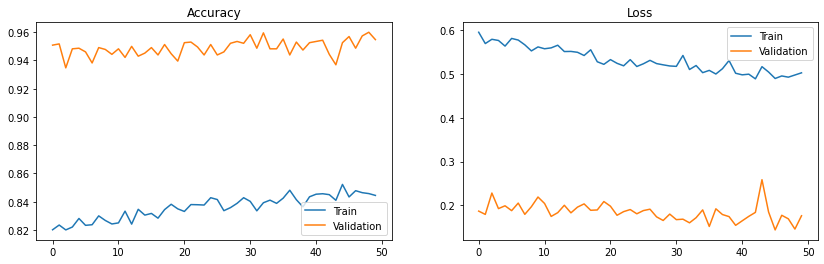

In [ ]:
Train_Accuracy = History.history['accuracy']
Val_Accuracy = History.history['val_accuracy']
Train_Loss = History.history['loss']
Val_Loss = History.history['val_loss']
epochs_range = range(Epochs)

plt.figure( figsize=(14,4) )
plt.subplot( 1,2,1 )
plt.plot( range( len(Train_Accuracy) ), Train_Accuracy, label='Train' ) 
plt.plot( range( len(Val_Accuracy) ), Val_Accuracy, label='Validation' ) 
plt.legend( loc='lower right' )
plt.title( 'Accuracy' )

plt.subplot( 1,2,2 )
plt.plot( range( len(Train_Loss) ), Train_Loss, label='Train' )
plt.plot( range( len(Val_Loss) ), Val_Loss, label='Validation' )
plt.legend( loc='upper right' )
plt.title( 'Loss')

plt.show()

### 儲存模型

In [ ]:
os.chdir( ModelH5Path )
model_epoch='CNN_Model_Epochs_100.h5'
CNN.save( model_epoch )

# Step 8: 自製繁中手寫測試集預測

## (8.1) 建立自製測試集的生成器( Generator )及走訪器( Iterator )

In [53]:
Image_Size = ( 50, 50 )
Test_Data_Genetor = ImageDataGenerator( rescale=1./255 )
Test_Generator = Test_Data_Genetor.flow_from_directory( TestingDataPath,
                                                        target_size = Image_Size,
                                                        shuffle = False,
                                                        class_mode = 'categorical' )

Found 40 images belonging to 20 classes.


In [ ]:
# batch = 1
# for data, label in Test_Generator:
#     print( f'batch {batch}: \n shape of images: {data.shape} \n shape of labels: {label.shape}' )
#     Plot_Genetor( data, label )
#     batch += 1
#     if batch > 1: 
#         break

## (8.2) 載入模型且預測

In [62]:
Test_Generator.reset()
os.chdir( ModelH5Path )
CNN = load_model('CNN_Model_Epochs_100.h5')
Predicts=CNN.predict(Test_Generator,verbose=1,batch_size=40)
Eval=CNN.evaluate(Test_Generator,verbose=1,batch_size=40)
predict_correct=0
predict_num=0

2/2 [==============================] - 0s 18ms/step - loss: 0.7817 - accuracy: 0.9000


## (8.3) 檢視預測結果

須了解預測的結果，一般會以機率呈現

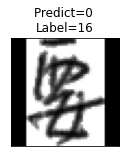

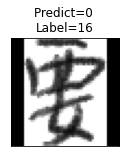

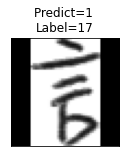

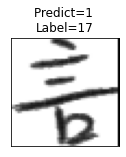

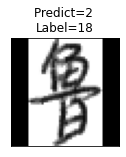

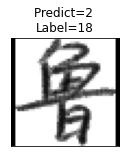

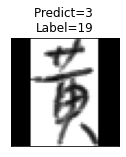

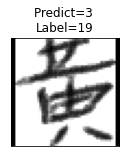

predict correct=30

predict count=40

Realistic Accuracy:75.0

Evaluate Loss:0.7817219495773315

Evaluate stand:0.8999999761581421



In [64]:
test_data, test_label = Test_Generator.next()
eval_loss, eval_stand = Eval
import sys



def Plot_Predict( img, labels=[], predicts=[], size=(20,2) ):   
    #print("Test Data:",img)           
    plt.gcf().set_size_inches(size)           
    ax = plt.subplot( )   
    ax.imshow( img )            
    ax.set_title( f'Predict={predicts.argmax(axis=0)} \nLabel={label.argmax(axis=0)}' )   
    ax.set_xticks([]); ax.set_yticks([]) 
    plt.show() 
    

 
for data, label, predict_label in zip(test_data,  test_label, Predicts):
  if predict_label.argmax(axis=0)==label.argmax(axis=0):
      predict_correct+=1
  predict_num+=1
  Plot_Predict( data, label, predict_label )

print(f'predict correct={predict_correct}\n')
print(f'predict count={predict_num}\n')
print(f'Realistic Accuracy:{predict_correct/predict_num*100}\n')
print(f'Evaluate Loss:{eval_loss}\n')
print(f'Evaluate stand:{eval_stand}\n')

## (8.4) 其他做法

 - 無分類資料夾預測方法

In [ ]:
os.mkdir('test')

for i in os.listdir(TestingDataPath):
  folder = TestingDataPath + '/' + i
  for f in os.listdir(folder):
    img_file = folder + '/' + f
    shutil.copyfile(img_file,'/content/test/' + f)

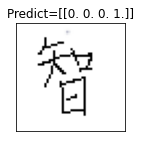

智_002.png


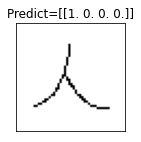

人_001.png


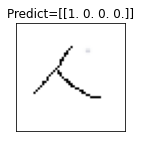

人_002.png


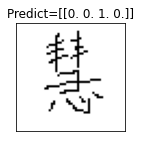

慧_002.png


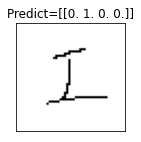

工_002.png


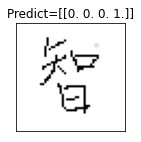

智_001.png


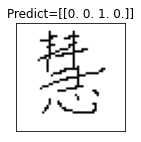

慧_001.png


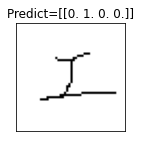

工_001.png


In [ ]:
from tensorflow.python.keras.preprocessing import image

directory = os.fsencode('/content/test')

# load trained model
model = load_model('CNN_Model.h5')

# predict all photos (loop though the folder)
for f in os.listdir(directory):
    f = os.fsdecode(f)
    img = image.load_img('/content/test/'+ str(f), target_size=(50, 50))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    pred = model.predict(x)

    ax = plt.subplot( )
    ax.imshow(img) 
    ax.set_title( f'Predict={pred.round(1)}' )
    ax.set_xticks([]); ax.set_yticks([]) 
    plt.gcf().set_size_inches((20,2))
    plt.show()
    print(f)